# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [7]:
# Resolver acá
import sys
!{sys.executable} -m pip install wbdata

In [8]:
!pip install wbdata
import wbdata
import pandas as pd

In [9]:
jobs = wbdata.get_indicators(source=25)

In [10]:
paises = wbdata.get_countries()

In [11]:
wbdata.get_data("IC.BUS.NREG", country=["ESP", "PRT"], date=("2016", "2018"))

[{'indicator': {'id': 'IC.BUS.NREG',
   'value': 'New businesses registered (number)'},
  'country': {'id': 'ES', 'value': 'Spain'},
  'countryiso3code': 'ESP',
  'date': '2018',
  'value': 93560,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IC.BUS.NREG',
   'value': 'New businesses registered (number)'},
  'country': {'id': 'ES', 'value': 'Spain'},
  'countryiso3code': 'ESP',
  'date': '2017',
  'value': 92613,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IC.BUS.NREG',
   'value': 'New businesses registered (number)'},
  'country': {'id': 'ES', 'value': 'Spain'},
  'countryiso3code': 'ESP',
  'date': '2016',
  'value': 98824,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'IC.BUS.NREG',
   'value': 'New businesses registered (number)'},
  'country': {'id': 'PT', 'value': 'Portugal'},
  'countryiso3code': 'PRT',
  'date': '2018',
  'value': 43114,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'in

In [12]:
indicadores = {'IC.BUS.NREG':'Negocios_creados','IC.REG.DURS':'Dias_para_empezar_negocio'}
data = wbdata.get_dataframe(indicadores, country=['ESP','PRT'])

df = pd.DataFrame(data=data)
df.reset_index(inplace=True)
df


,country,date,Negocios_creados,Dias_para_empezar_negocio
0,Spain,2023,NaN,NaN
1,Spain,2022,96655.0,NaN
2,Spain,2021,99159.0,NaN
3,Spain,2020,77541.0,NaN
4,Spain,2019,92010.0,12.5
...,...,...,...,...
123,Portugal,1964,NaN,NaN
124,Portugal,1963,NaN,NaN
125,Portugal,1962,NaN,NaN
126,Portugal,1961,NaN,NaN


In [13]:
df['date'] = pd.to_numeric(df['date'], errors='coerce')
df_filtrado = df[(df['country'].isin(['Spain', 'Portugal'])) & (df['date'].between(2009, 2019))]
print(df_filtrado)


     country  date  Negocios_creados  Dias_para_empezar_negocio
4      Spain  2019           92010.0                       12.5
5      Spain  2018           93560.0                       12.5
6      Spain  2017           92613.0                       13.0
7      Spain  2016           98824.0                       13.0
8      Spain  2015           91750.0                       14.0
9      Spain  2014           91544.0                       14.0
10     Spain  2013           90373.0                       24.0
11     Spain  2012           84399.0                       30.0
12     Spain  2011           81027.0                       29.0
13     Spain  2010           75885.0                       52.0
14     Spain  2009           74333.0                       61.0
68  Portugal  2019           46880.0                        6.5
69  Portugal  2018           43114.0                        6.5
70  Portugal  2017           37571.0                        6.5
71  Portugal  2016           33651.0    

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [15]:
df_filtrado.groupby("country").describe()

date                                                            \
         count    mean       std     min     25%     50%     75%     max   
country                                                                    
Portugal  11.0  2014.0  3.316625  2009.0  2011.5  2014.0  2016.5  2019.0   
Spain     11.0  2014.0  3.316625  2009.0  2011.5  2014.0  2016.5  2019.0   

         Negocios_creados                ...                    \
                    count          mean  ...      75%      max   
country                                  ...                     
Portugal             11.0  34168.909091  ...  35845.5  46880.0   
Spain                11.0  87847.090909  ...  92311.5  98824.0   

         Dias_para_empezar_negocio                                           \
                             count  mean        std   min   25%   50%   75%   
country                                                                       
Portugal                      11.0   6.5   0.447214   6.0   6.0   6.5   7.0   
Spain                         11.0  25.0  17.057257  12.5  13.0  14.0  29.5   

                
           max  
country         
Portugal   7.0  
Spain     61.0  

[2 rows x 24 columns]

In [16]:
df_filtrado.columns

Index(['country', 'date', 'Negocios_creados', 'Dias_para_empezar_negocio'], dtype='object')

In [17]:
df_filtrado

,country,date,Negocios_creados,Dias_para_empezar_negocio
4,Spain,2019,92010.0,12.5
5,Spain,2018,93560.0,12.5
6,Spain,2017,92613.0,13.0
7,Spain,2016,98824.0,13.0
8,Spain,2015,91750.0,14.0
9,Spain,2014,91544.0,14.0
10,Spain,2013,90373.0,24.0
11,Spain,2012,84399.0,30.0
12,Spain,2011,81027.0,29.0
13,Spain,2010,75885.0,52.0


In [18]:
df_estadistico=df_filtrado.groupby("country").describe()
df_correcto = df_estadistico.drop(["date"], axis=1)
df_correcto.round(0).astype(int)

Negocios_creados                                                  \
                    count   mean   std    min    25%    50%    75%    max   
country                                                                     
Portugal               11  34169  6119  27803  30180  32081  35846  46880   
Spain                  11  87847  7827  74333  82713  91544  92312  98824   

         Dias_para_empezar_negocio                               
                             count mean std min 25% 50% 75% max  
country                                                          
Portugal                        11    6   0   6   6   6   7   7  
Spain                           11   25  17  12  13  14  30  61

In [19]:
df_filtrado

,country,date,Negocios_creados,Dias_para_empezar_negocio
4,Spain,2019,92010.0,12.5
5,Spain,2018,93560.0,12.5
6,Spain,2017,92613.0,13.0
7,Spain,2016,98824.0,13.0
8,Spain,2015,91750.0,14.0
9,Spain,2014,91544.0,14.0
10,Spain,2013,90373.0,24.0
11,Spain,2012,84399.0,30.0
12,Spain,2011,81027.0,29.0
13,Spain,2010,75885.0,52.0


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [21]:
# Resolver acá estilo pyplot
!pip install matplotlib
import matplotlib.pyplot as plt
import os

In [22]:
df_grafico = df_filtrado.groupby(by=["date","country"])
df_grafico

In [23]:
df_filtrado.shape

(22, 4)

In [67]:
españa_dias = df_filtrado[df_filtrado["country"]=="Spain"]["Dias_para_empezar_negocio"]
españa_años = df_filtrado[df_filtrado["country"]=="Spain"]["date"]

portugal_dias = df_filtrado[df_filtrado["country"]=="Portugal"]["Dias_para_empezar_negocio"]
portugal_años = df_filtrado[df_filtrado["country"]=="Portugal"]["date"]

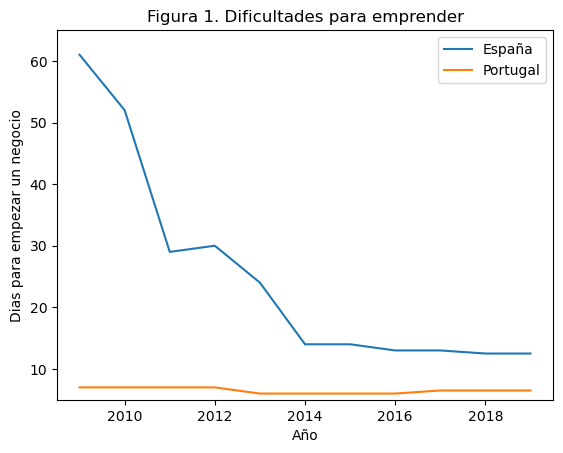

In [69]:
plt.plot(españa_años, españa_dias, label="España")
plt.plot(portugal_años, portugal_dias, label="Portugal")
plt.xlabel("Año")
plt.ylabel("Dias para empezar un negocio")
plt.title("Figura 1. Dificultades para emprender")
plt.ylim(5, 65)
plt.legend()
plt.show()

In [26]:
df_grafico = df_filtrado.groupby(by=["date","country"])
df_grafico

In [27]:
df_filtrado.shape

(22, 4)

In [28]:
y1 = df_filtrado[df_filtrado["country"]=="Spain"]["Negocios_creados"]
x1 = df_filtrado[df_filtrado["country"]=="Spain"]["date"]

y2 = df_filtrado[df_filtrado["country"]=="Portugal"]["Negocios_creados"]
x2 = df_filtrado[df_filtrado["country"]=="Portugal"]["date"]

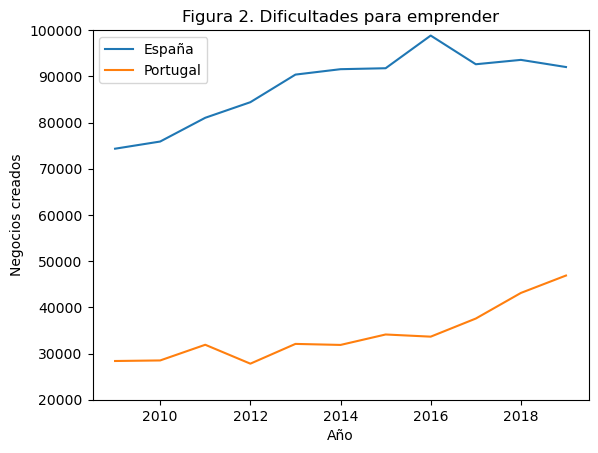

In [29]:
plt.plot(x1, y1, label="España")
plt.plot(x2, y2, label="Portugal")
plt.xlabel("Año")
plt.ylabel("Negocios creados")
plt.title("Figura 2. Dificultades para emprender")
plt.ylim(20000, 100000)
plt.legend()
plt.show()

AttributeError: 'Axes' object has no attribute 'ylim'

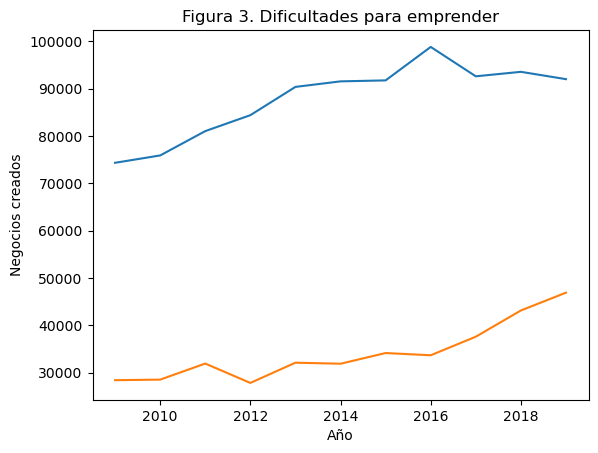

In [30]:
fig, ax = plt.subplots() 
ax.plot(x1, y1, label="España") 
ax.plot(x2, y2, label="Portugal") 
ax.set_xlabel("Año")
ax.set_ylabel("Negocios creados")
ax.set_title("Figura 3. Dificultades para emprender")
ax.ylim(20000, 100000)
ax.legend()
fig.show()


In [31]:
df_graficado = df_filtrado.set_index(["date"])

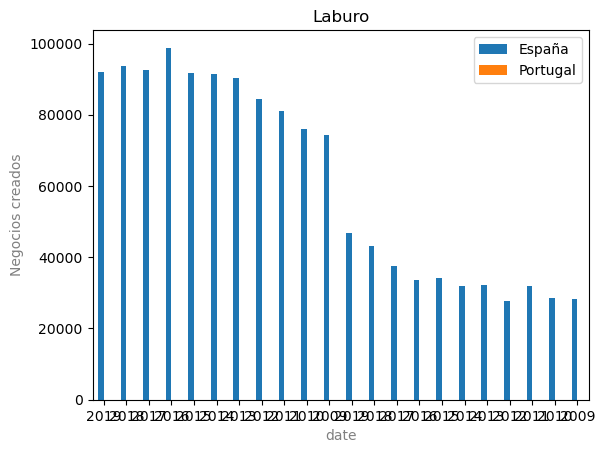

In [33]:
ax = df_graficado.plot(kind='bar', title='Laburo')
ax.set_xlabel('date',color='grey')
ax.set_ylabel('Negocios creados',color='grey')
ax.tick_params(axis="x", rotation=0)
ax.legend(["España","Portugal"])

C:\Users\Juan T\AppData\Local\Temp\ipykernel_18740\758860548.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


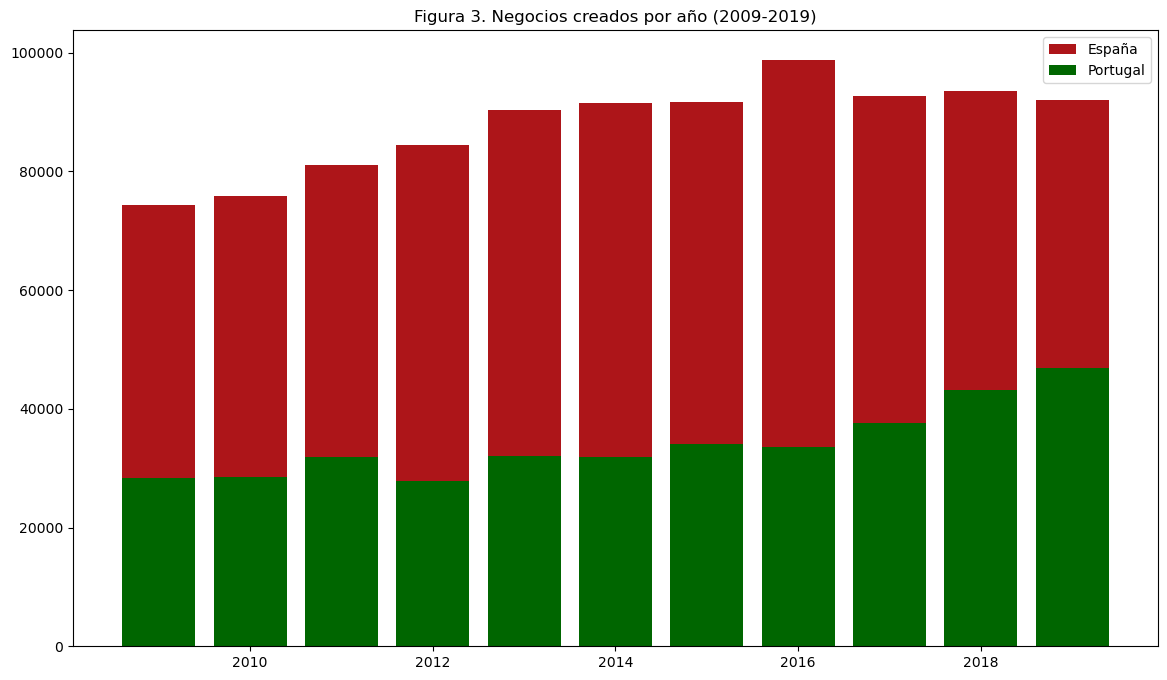

In [41]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(x1, y1, label='España', color="#AD1519")  
ax.bar(x2, y2, label='Portugal', color="#006600")  
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Figura 3. Negocios creados por año (2009-2019)")
ax.legend()
fig.show()
#decidimos borrar la leyenda del eje y porque suponemos que queda claro con el título principal que nos referimos a negocios creados
#lo mismo hicimos con el eje x, creemos que queda claro que estamos hablando de los años.

C:\Users\Juan T\AppData\Local\Temp\ipykernel_18740\3977633970.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


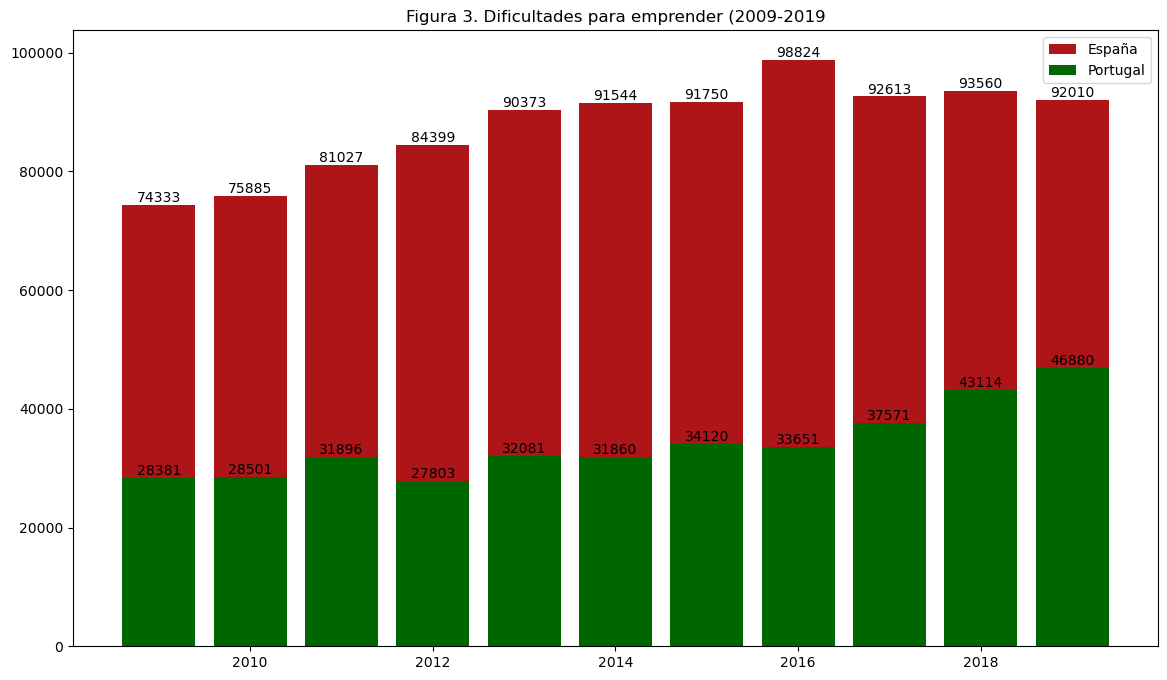

In [65]:
#como bonus, creemos que el gráfico puede mejorar si le incluimos el número exacto sobre cada barra
fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x1, y1, label='España', color="#AD1519")
bars2 = ax.bar(x2, y2, label='Portugal', color="#006600")

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom')

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Figura 3. Dificultades para emprender (2009-2019)")
ax.legend()
fig.show()

In [53]:
españa_dias = df_filtrado[df_filtrado["country"]=="Spain"]["Dias_para_empezar_negocio"]
españa_años = df_filtrado[df_filtrado["country"]=="Spain"]["date"]

portugal_dias = df_filtrado[df_filtrado["country"]=="Portugal"]["Dias_para_empezar_negocio"]
portugal_años = df_filtrado[df_filtrado["country"]=="Portugal"]["date"]

C:\Users\Juan T\AppData\Local\Temp\ipykernel_18740\1262780465.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


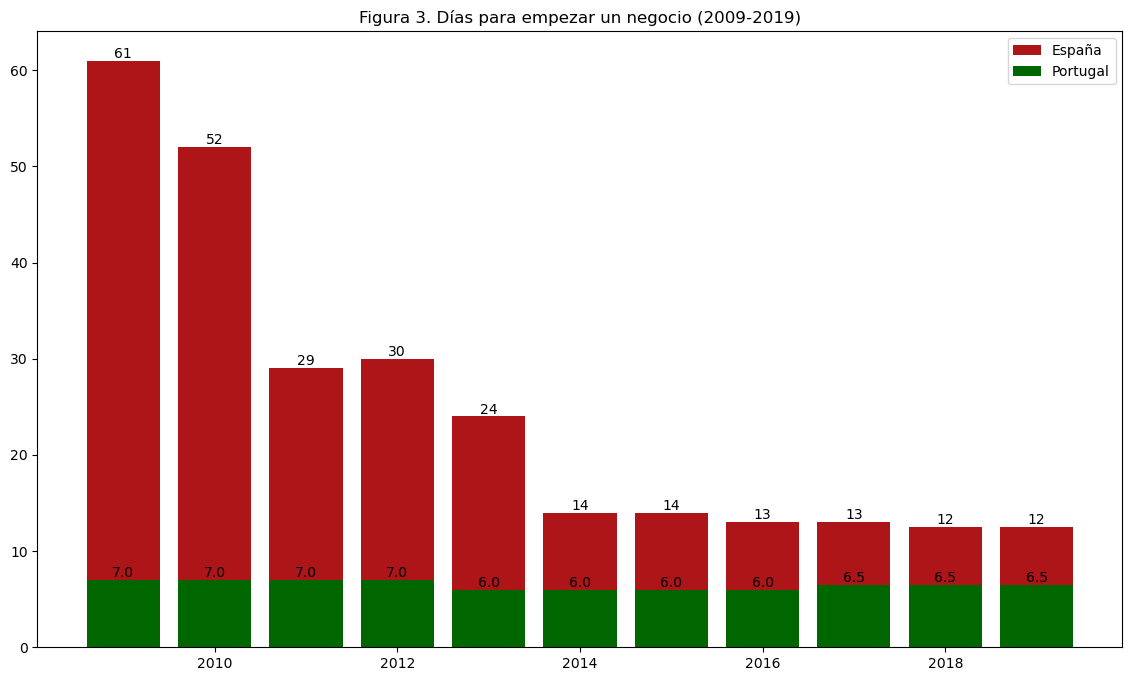

In [73]:
fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(españa_años , españa_dias, label='España', color="#AD1519")
bars2 = ax.bar(portugal_años, portugal_dias , label='Portugal', color="#006600")

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{(height)}',
            ha='center', va='bottom')

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Figura 3. Días para empezar un negocio (2009-2019)")
ax.legend()
fig.show()

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.